###### This notebook is to do feature filtering, cleaning, normalization and extraction and write a CSV file that can be input for mz-to-metabolite lookup

In [26]:
import pickle
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from numpy import inf
pd.set_option('display.max_rows', 2000)
pd.set_option('display.max_columns', 2000)

##### Do you want to save a new pd df as a csv with mz/rt/values after filtering?
save = False

In [14]:
metadata = pd.read_csv('./mtab_Alm_UW_Lumos_072718_csv.csv', skiprows=1)

samples = list(metadata['Sample Name'])
pooled = [s for s in samples if 'pool' in s]
pooled_no_spike = [s for s in pooled if 'spike' not in s and 'pos' not in s]
blanks = [s for s in samples if 'Blank' in s]
alm_mix = [s for s in samples if 'mix' in s]
pooled_blanked = pooled + blanks + alm_mix
not_pooled_blanked = [s for s in samples if s not in pooled_blanked and 'CTL' not in s and 'EIA' not in s and 'NO-CEN' not in s]
sample_controls = [s for s in samples if 'CTL' in s]
pooled = [s for s in pooled if 'pos' not in s]
blanks = [s for s in blanks if 'pos' not in s]
alm_mix = [s for s in alm_mix if 'pos' not in s]

pooled_metadata = metadata[metadata['Sample Name'].isin(pooled)]
pooled_no_spike_metadata = metadata[metadata['Sample Name'].isin(pooled_no_spike)]
blanks_metadata = metadata[metadata['Sample Name'].isin(blanks)]
alm_mix_metadata = metadata[metadata['Sample Name'].isin(alm_mix)]
mit_metadata = metadata[metadata['Sample Name'].isin(not_pooled_blanked)]
mit_controls_metadata = metadata[metadata['Sample Name'].isin(sample_controls)]

file_names = list(metadata['File Name'])
file_names = [f+'.mzML' for f in file_names]

def fix_nan_pooled(df):
    df = df.replace(0, np.nan)
    df_m = df.mean(axis=0)
    df = df.fillna(df_m)
    return df
metadata = metadata.sort_values('Sample Name')

In [15]:
metadata

,Sample Type,File Name,Sample ID,Path,Instrument Method,Position,Inj Vol,Level,Sample Name
165,Blank,mtab_alm_UW_072718_166,R:A1,C:\Xcalibur\Data\Alm\2018_0727 Siavash samples,C:\Xcalibur\methods\Training\UPLC_neg_HCD_OT_0...,R:A1,10,NaN,MQ Blank neg
150,Blank,mtab_alm_UW_072718_151,R:A1,C:\Xcalibur\Data\Alm\2018_0727 Siavash samples,C:\Xcalibur\methods\Training\UPLC_neg_HCD_OT_0...,R:A1,10,NaN,MQ Blank neg
164,Blank,mtab_alm_UW_072718_165,R:A1,C:\Xcalibur\Data\Alm\2018_0727 Siavash samples,C:\Xcalibur\methods\Training\UPLC_neg_HCD_OT_0...,R:A1,10,NaN,MQ Blank neg
78,Blank,mtab_alm_UW_072718_79,R:A1,C:\Xcalibur\Data\Alm\2018_0727 Siavash samples,C:\Xcalibur\methods\Training\UPLC_neg_HCD_OT_0...,R:A1,10,NaN,MQ Blank neg
77,Blank,mtab_alm_UW_072718_78,R:A1,C:\Xcalibur\Data\Alm\2018_0727 Siavash samples,C:\Xcalibur\methods\Training\UPLC_neg_HCD_OT_0...,R:A1,10,NaN,MQ Blank neg
148,Blank,mtab_alm_UW_072718_149,R:A1,C:\Xcalibur\Data\Alm\2018_0727 Siavash samples,C:\Xcalibur\methods\Training\UPLC_neg_HCD_OT_0...,R:A1,10,NaN,MQ Blank neg
147,Blank,mtab_alm_UW_072718_148,R:A1,C:\Xcalibur\Data\Alm\2018_0727 Siavash samples,C:\Xcalibur\methods\Training\UPLC_neg_HCD_OT_0...,R:A1,10,NaN,MQ Blank neg
75,Blank,mtab_alm_UW_072718_76,R:A1,C:\Xcalibur\Data\Alm\2018_0727 Siavash samples,C:\Xcalibur\methods\Training\UPLC_neg_HCD_OT_0...,R:A1,10,NaN,MQ Blank neg
74,Blank,mtab_alm_UW_072718_75,R:A1,C:\Xcalibur\Data\Alm\2018_0727 Siavash samples,C:\Xcalibur\methods\Training\UPLC_neg_HCD_OT_0...,R:A1,10,NaN,MQ Blank neg
149,Blank,mtab_alm_UW_072718_150,R:A1,C:\Xcalibur\Data\Alm\2018_0727 Siavash samples,C:\Xcalibur\methods\Training\UPLC_neg_HCD_OT_0...,R:A1,10,NaN,"MQ Blank neg (07.31.18 rerun some samples, new..."


In [16]:
# load in the data - multiple data files:
# 1) for IPO calc params: IPO_aligned_long_UW_MIT.csv
# 2) params used in XCMS from WHOI: IPO_aligned_long_UW_MIT_WHOI_settings.csv
master_data = pd.read_csv('./IPO_aligned_long_UW_MIT_WHOI_settings_50000noise_ms2test.csv') 
peaks_data = master_data[['mz','mzmin','mzmax','rt','rtmin','rtmax','npeaks','X1', 'isotopes', 'adduct', 'pcgroup']]
peaks_data = peaks_data.sort_values('mz')
peaks_data = peaks_data.round(5)
features = master_data.iloc[:,9:-3].T.astype('float')
features[features < 1] = 1
features = features.fillna(1) 
features = np.log2(features)
### we deal with the 0s later by 1/2 min filling for real samples
## get data in the same order as the metadata data just in case
features = features.loc[file_names]
## This is still all of the data together, have not seperated blanks, QC, samples, mixes. 

In [17]:
##### splitting the data into different data frames for the different sample types #####
def get_file_names(name_list):
    return [ele+'.mzML' for ele in name_list]
        
#### splits features into the various types (alm mix, blank, pool and samples)
alm_mix_feat = features.loc[get_file_names(list(alm_mix_metadata['File Name']))] 
blank_feat = features.loc[get_file_names(list(blanks_metadata['File Name']))] 
control_feat = features.loc[get_file_names(list(mit_controls_metadata['File Name']))]
## critically important stuff the data and normalization: 
mit_feat = features.loc[get_file_names(list(mit_metadata['File Name']))]
pool_no_spike_feat = features.loc[get_file_names(list(pooled_no_spike_metadata['File Name']))]

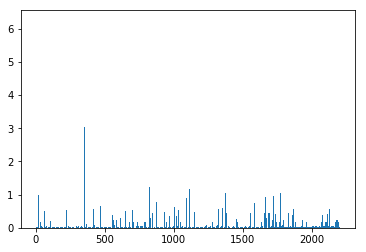

features pre cv filtering:  (91, 2207)
features post cv filtering:  (91, 1819)


In [18]:
# plot the pooled coefficient of variance to learn about how much the peaks change run to run
cv_feat = pool_no_spike_feat

pool_feat_mean = cv_feat.mean(axis=0)
pool_feat_std = cv_feat.std(axis=0)
pool_cv = pool_feat_std / pool_feat_mean
plt.bar([i for i in range(pool_cv.shape[0])], pool_cv)
plt.show()

pool_cv_mask = pool_cv < 0.3

print('features pre cv filtering: ',mit_feat.shape)
###### Feature filtering by CV 
column_mask = mit_feat.columns[pool_cv_mask]
mit_feat = mit_feat[column_mask]
control_feat = control_feat[column_mask]
blank_feat = blank_feat[column_mask]
pool_no_spike_feat = pool_no_spike_feat[column_mask]
#### also filter the peaks data at the same time!
peaks_data = peaks_data.loc[pool_cv_mask]
print('features post cv filtering: ',mit_feat.shape)
## for pooled samples get avg to replace 0s since these are all the same samples, so all peaks should be present
pool_no_spike_feat = fix_nan_pooled(pool_no_spike_feat)

In [19]:
########### START NORMALIZATION ############
###### doing with local QC mean values and global QC (no spiked) 
## formula: X' = X* (R/C) where R is the global avg of QC, C is the local correction and X is the original peak
## get the global QC average for the R without spiked QC
def find_qc_range(qc_names, sample_name):
    '''
    This is dealing with the run order for the samples and get the two QC samples flanking a group of 
    'real' samples.
    '''
    for qc_name in qc_names:
        qc_1, qc_2 = qc_name.split('_')
        if int(qc_1) <= int(sample_name) <= int(qc_2):
            return qc_name
        if int(sample_name) == 2:
            return '15_22'
        if int(sample_name) > 163:
            return '157_163'

def extract_name(list_of_names):
    combined = []
    for ele in list_of_names:
        ele = ele.split('_')
        combined.append(ele[-1][0:-5])
    combined = '_'.join(combined)
    return combined

global_qc_avg = pool_no_spike_feat.mean(axis=0)
## remove that features that does show up in pools at all...from peaks_data, qcs and mit_feat
## fyi this should be 0
not_in_qc = global_qc_avg != 0.0
global_qc_avg = global_qc_avg[not_in_qc]
pool_no_spike_feat = pool_no_spike_feat.loc[:,not_in_qc]
mit_feat = mit_feat.loc[:,not_in_qc]
peaks_data_not_qc = peaks_data.loc[not_in_qc]
control_feat = control_feat.loc[:,not_in_qc]
blank_feat = blank_feat.loc[:,not_in_qc]

# make the df of the QC averages of neighboring QC samples 
combined = []
names = []
column_names = list(pool_no_spike_feat)
for i in range(pool_no_spike_feat.shape[0]-1):
    combined.append(list(pool_no_spike_feat.iloc[i:i+2].mean().values))
    names.append(extract_name(list(pool_no_spike_feat.iloc[i:i+2].index)))
avg_two_qc = pd.DataFrame(combined, index=names, columns=column_names)
# ##### NORMALIZE: MIT_FEAT (REAL DATA), CONTROL SAMPLES, BLANKS
# do the normalization row by row:
# get the names of the rows - ie the order they were run in to match to the appropriate QCs
columns_ = list(mit_feat.columns)
mit_feat_names_old = list(mit_feat.index)
mit_feat_names = [n.split('_')[-1][0:-5] for n in mit_feat_names_old]
normalized_rows = []
for i, sample in enumerate(mit_feat_names):
    row = mit_feat.iloc[i,:]
    qc_row = find_qc_range(names, sample)
#     qc_inds.append(qc_row)
    qc_row = avg_two_qc.loc[qc_row]
    qc_row[qc_row == 0.0] = global_qc_avg
    row = row*(global_qc_avg/qc_row)
    normalized_rows.append(list(row))
normalized_mit_feat = pd.DataFrame(normalized_rows, index=mit_feat_names_old, columns=columns_)

control_feat_names_old = list(control_feat.index)
control_feat_names = [n.split('_')[-1][0:-5] for n in control_feat_names_old]
normalized_rows = []
for i, sample in enumerate(control_feat_names):
    row = control_feat.iloc[i,:]
    qc_row = find_qc_range(names, sample)
    qc_row = avg_two_qc.loc[qc_row]
    qc_row[qc_row == 0.0] = global_qc_avg
    row = row*(global_qc_avg/qc_row)
    normalized_rows.append(list(row))
normalized_control_feat = pd.DataFrame(normalized_rows, index=control_feat_names_old, columns=columns_)

blank_feat_names_old = list(blank_feat.index)
blank_feat_names = [n.split('_')[-1][0:-5] for n in blank_feat_names_old]
normalized_rows = []
for i, sample in enumerate(blank_feat_names):
    row = blank_feat.iloc[i,:]
    qc_row = find_qc_range(names, sample)
    qc_row = avg_two_qc.loc[qc_row]
    qc_row[qc_row == 0.0] = global_qc_avg
    row = row*(global_qc_avg/qc_row)
    normalized_rows.append(list(row))
normalized_blank_feat = pd.DataFrame(normalized_rows, index=blank_feat_names_old, columns=columns_)

In [23]:
#### subtract out the blank since there are not enough controls for each building and the building 84 control was messed up
blank_mean = normalized_blank_feat.mean(axis=0)
normalized_control_feat -= blank_mean
normalized_control_feat[normalized_control_feat < 0 ] = 0
normalized_mit_feat -= blank_mean
normalized_mit_feat[normalized_mit_feat < 0 ] = 0

In [24]:
min_val = 0
columns = []
for i in normalized_mit_feat.columns:
    column = normalized_mit_feat[i]
    if column.sum() > 100:
        columns.append(i)
normalized_mit_feat_cv_filt = normalized_mit_feat[columns]
print(normalized_mit_feat_cv_filt.shape)
normalized_blank_feat_cv_filt = normalized_blank_feat[columns]
normalized_control_feat_cv_filt = normalized_control_feat[columns]
print('control / blank', normalized_control_feat_cv_filt.shape, normalized_blank_feat_cv_filt.shape)
peaks_data_cv_filt = peaks_data.loc[columns]
print(peaks_data_cv_filt.shape)

(91, 1425)
control / blank (9, 1425) (12, 1425)
(1425, 11)


In [25]:
# change the sample names to the date / locations instead of the file name for the features 
def get_mapper(df):
    files = list(df['File Name'])
    files = get_file_names(files)
    names = list(df['Sample Name'])
    return {f:s for f,s in zip(files,names)}

# change the name of the sample to get a better idea what they are:
mapper = get_mapper(metadata)

mit_feat_final = normalized_mit_feat_cv_filt.rename(mapper, axis='index')
blank_final = normalized_blank_feat_cv_filt.rename(mapper, axis='index')
control_final = normalized_control_feat_cv_filt.rename(mapper, axis='index')

In [27]:
def get_building(name_list):
    dates = []
    locs = []
    for loc in name_list:
        date_loc = loc.strip().split()[1].split('B')
        date = date_loc[0]
        if date_loc[1][0] == '7':
            loc = date_loc[1][:1]
        elif date_loc[1][0] == '6' or '8':
            loc = date_loc[1][:2]
        dates.append(date)
        locs.append(loc)
    return dates, locs

# Here is probably a good place to dereplicate before the rest of the analysis
# ok now to average the replicates if they are available:
def avg_replicates(building_df, list_replicate_pairs):
    for pair in list_replicate_pairs:
        name = ' '.join(pair[0].split(' ')[:2])
        name += '_avg'
        row_pair = building_df.loc[pair]
        row_mean = row_pair.mean(axis=0)
        building_df = building_df.drop(index=pair)
        building_df.loc[name] = row_mean
    return building_df
    
def sort_date(month_df, sorted_df):
    month_dates = list(month_df.index)
    dates = []
    for date in month_dates:
        d = int(date.strip().split('B')[0][4:])
        dates.append((d,date))
    names = sorted(dates, key=lambda x: x[0])
    sorted_date_names = [n[1] for n in names]
    sorted_month_df = month_df.loc[sorted_date_names]
    sorted_df.append(sorted_month_df)
    return sorted_df
    
def sort_month(unsorted_df):
    '''
    need o then n then d
        then inside each of these sort by date
    '''
    name_list = list(unsorted_df.index)
    oct_names = [name for name in name_list if 'O' in name]
    nov_names = [name for name in name_list if 'N' in name]
    dec_names = [name for name in name_list if 'D' in name]
    sorted_df_list = []
    for month in [oct_names, nov_names, dec_names]:
        sorted_df_list = sort_date(unsorted_df.loc[month], sorted_df_list)
    return pd.concat(sorted_df_list)

analysis_feat = mit_feat_final.copy()
rename = [name+"_{}".format(i) for i, name in enumerate(list(analysis_feat.index))]
analysis_feat['renamed'] = rename
analysis_feat = analysis_feat.set_index('renamed')
sample_names = list(analysis_feat.index)

# ### 1) split by location
# NOTE ONE SAMPLE IS building '89' (UW N4B89 neg_5) this is actually building 84
building_7_names = [name for name in sample_names if 'B7' in name]
building_84_names = [name for name in sample_names if 'B84' in name or 'B89' in name]
building_61_names = [name for name in sample_names if 'B61' in name]
combined_names_sorted = building_7_names + building_61_names + building_84_names

building_7 = analysis_feat.loc[building_7_names]
building_84 = analysis_feat.loc[building_84_names]
building_61 = analysis_feat.loc[building_61_names]
#### 2) fix labels and drop 1 sample we dont know whether it should have been D16 or D6...its 'D60'
# also to fix labels:
correct = {'UW N4B89 neg_5':'UW N4B84 neg_5'}
building_84 = building_84.rename(correct)
building_84 = building_84.drop(labels='UW D60B84 neg _23')

##### 3) average replicates and remove the oringinal values from the data
b_7_replicates = [['UW O4B7 neg_4', 'UW O4B7 neg _83'],
                  ['UW O18B7 neg _57', 'UW O18B7 neg _65'],
                  ['UW O21B7 neg _34', 'UW O21B7 neg _69'],
                  ['UW N4B7 neg_9', 'UW N4B7 neg _18'],
                  ['UW D2B7 neg _41', 'UW D2B7 neg_46'],
                  ['UW D20B7 neg_11', 'UW D20B7 neg_56']]
b_61_replicates = [['UW O4B61 neg_1', 'UW O4B61 neg _39'],
                   ['UW O18B61 neg _66', 'UW O18B61 neg _74'],
                   ['UW O21B61 neg _64', 'UW O21B61 neg _88'],
                   ['UW N4B61 neg _31', 'UW N4B61 neg_47'],
                   ['UW D2B61 neg_53', 'UW D2B61 neg_55'],
                   ['UW D20B61 neg_0', 'UW D20B61 neg _77']]
b_84_replicates = [['UW O4B84 neg_10', 'UW O4B84 neg _72'],
                   ['UW O18B84 neg _60', 'UW O18B84_2 neg _67'],
                   ['UW O20B84 neg _45', 'UW O20B84 neg_50'],
                   ['UW O21B84 neg _58', 'UW O21B84 neg _85'],
                   ['UW N4B84 neg_5', 'UW N4B84 neg _25']]

def make_zeros_plot(building,b_reps,title):
    multi_zeros = []
    all_zeros = []
    m_zeros = []
    for reps in b_reps:
        repeats = building.loc[reps]
        sumrep = repeats.sum()==0
        multi_zeros+=list(repeats.loc[:,sumrep].columns)
        both_zero = repeats.loc[:,sumrep].count().sum()
        all_zeroes = repeats[repeats==0].count().sum()
        all_zeros.append(all_zeroes)
        m_zeros.append(both_zero)
    zeros_dict = {}
    for d in multi_zeros:
        if d not in zeros_dict:
            zeros_dict[d] = 1
        else:
            zeros_dict[d] += 1
    ## make first plot:
    fig = plt.figure(figsize=(5,5))
    ax = fig.add_subplot()
    ax.bar([i for i in range(len(all_zeros))], all_zeros, color='gray', edgecolor='k')
    ax.bar([i for i in range(len(all_zeros))], m_zeros, color='c', edgecolor='k')
    running_avg = []
    for i,a0,m0 in zip([i for i in range(len(all_zeros))],all_zeros,m_zeros):
        ax.text(i-0.3,a0+5,'{}%'.format(100*round(m0/a0,2))) # + 5 normally, +2 for b3
        running_avg.append(m0/a0)
    title_1 = title + ' {}% zeros across replicates'.format(round(100*np.asarray(running_avg).mean(),3))
    ax.spines['right'].set_visible(False)
    ax.spines['top'].set_visible(False)
    ax.set_title(title_1,fontname='sans-serif', fontsize=12)
    ax.set_xlabel('sample with replicate',fontname='sans-serif', fontsize=12)
    ax.set_ylabel('number of 0s',fontname='sans-serif', fontsize=12)
    plt.savefig('{}.svg'.format('_'.join(title_1.split(' '))), format='svg', dpi=1000, bbox_inches='tight')
    ## make second plot:
    fig = plt.figure(figsize=(4,10)) # 10 normally, 20 for b2
    ax = fig.add_subplot()
    to_plot = sorted([(k,v) for k,v in zeros_dict.items()],key=lambda x:x[0])
    y_val = [i for i in range(len(to_plot))]
    ax.barh(y_val, [e[1] for e in to_plot], tick_label=[e[0] for e in to_plot], color='lightcoral', edgecolor='k')
    ax.spines['right'].set_visible(False)
    ax.spines['top'].set_visible(False)
    ax.set_ylim(y_val[0]-0.75,y_val[-1]+0.75)
    title_2 = title + ' features with 0s'
    ax.set_title(title_2,fontname='sans-serif', fontsize=12)
    ax.set_xlabel('number of replicates with shared 0',fontname='sans-serif', fontsize=12)
    plt.savefig('{}.svg'.format('_'.join(title_2.split())), format='svg', dpi=1000, bbox_inches='tight')

# make_zeros_plot(building_7, b_7_replicates,'B-1')
# make_zeros_plot(building_61, b_61_replicates,'B-2')
# make_zeros_plot(building_84, b_84_replicates,'B-3')

building_7 = avg_replicates(building_7, b_7_replicates)
building_61 = avg_replicates(building_61, b_61_replicates)
building_84 = avg_replicates(building_84, b_84_replicates)

def replace_index(df):
    week_day = {'O2':'M','O3':'T','O4':'W', 'O5':'R', 'O6':'F', 'O11':'W','O12':'R',
            'O13':'F','O14':'Sa', 'O16':'M', 'O18':'W', 'O19':'R','O20':'F','O21':'Sa',
            'O23':'M','O24':'T','O25':'W','N4':'Sa', 'N8':'W','N11':'Sa','N15':'W','N18':'Sa',
            'N22':'W','N29':'W','D2':'Sa','D6':'W','D9':'Sa','D13':'W', 'D16':'Sa','D20':'W'}
    import re
    ind = [re.split('\W+', ele)[1] for ele in list(df.index)]
    days = [ele.split('B')[0] for ele in ind]
    mapper = {ele:week_day[ind]+'_'+date_building for ele, ind,date_building in zip(list(df.index), days, ind)}
    df = df.rename(index=mapper)
    return df

def half_min(df):
    min_val_non_zero = df[df>0].min()/2
    min_val_non_zero = min_val_non_zero.fillna(min_val_non_zero.min())
    for z_fill, kv in zip(min_val_non_zero,df.iteritems()): 
        kv[1][kv[1]==0]= z_fill
    return df
### the O19 samples were processed incorrectly by xcms and not using, it was somehow integrating background
### over the whole chromatogram giving wildly high intensities. 
### 4) order by date / month
sorted_b_7 = sort_month(building_7)
sorted_b_7 = replace_index(sorted_b_7)
sorted_b_7.drop(index=['R_O19B7'], inplace=True)
sorted_b_7 = half_min(sorted_b_7)

sorted_b_84 = sort_month(building_84)
sorted_b_84 = replace_index(sorted_b_84)
sorted_b_84.drop(index=['R_O19B84'], inplace=True)
sorted_b_84 = half_min(sorted_b_84)

sorted_b_61 = sort_month(building_61)
sorted_b_61 = replace_index(sorted_b_61)
sorted_b_61.drop(index=['R_O19B61'], inplace=True)
sorted_b_61 = half_min(sorted_b_61)

combined_data = pd.concat([sorted_b_7,sorted_b_61,sorted_b_84], axis=0)
old_col = list(combined_data)
orig_col_to_red = dict(zip([i for i in range(len(old_col))], old_col))

if save:
    all_data_sorted = {'sorted_b_7':sorted_b_7, 'sorted_b_61':sorted_b_61, 'sorted_b_84':sorted_b_84}
    pickle.dump(all_data_sorted, open('./processed_sorted_indiv_building_data_new.pkl', 'wb'))

In [28]:
# write this processed data to a file with mz/rt/features from sample + blanks + controls post processing
if save:
    pd.concat([peaks_data_cv_filt,combined_data.T, blank_final.T, control_final.T], axis=1).to_csv('./post_filt_samples_blanks_controls_new.csv')

Use the following POST metabolite naming

In [29]:
#### GET THE METABOLITE NAMES FROM THE METFRAG / VOTING PROTOCOL AND ADD TO THE MZ/RT DATAFRAME - THIS IS A SUMMARY DF CARRIED THROUGHOUT
####need to add the values in the 'peaks' dataframe with the mz/rt data
putative_metabs = pd.read_csv('./4-13-19_long_MIT_50000noise_metfrag_mzlookup.csv')
putative_metabs = putative_metabs.round(5)
peaks_data_cv_filt['true_labels'] = list(peaks_data_cv_filt.index)
peaks_data_og_with_metab = pd.merge(peaks_data_cv_filt, putative_metabs, how='left', on=['mz','rt'])
### OK USE THIS TO GET THE TRUE METAB MAPPING.....
peaks_data_og_with_metab = peaks_data_og_with_metab.set_index('true_labels')
to_replace_named_metabs = peaks_data_og_with_metab['metfrag_matched_best_guess'].to_dict()
if save:
    peaks_data_og_with_metab.to_csv('./4-13-19_combined_mz_rt_metfrag_votes_isotopes_new.csv')

In [30]:
#### This goes through the mz/rt/names dataframe and removes silly names, ie polymers, random metals etc. 
import ast
remove_elements = ['Ac','Mt','Ag','Al','Na','Am','Nb','Ar','Nd','As','Ne','At','Au','Ba','Be','Og','Bi','Pa',
                   'Pb','Ca','Pd','Cd','Pm','Ce','Pr','Pt','Cm','Pu','Ra','Rb','Cr','Re','Rf','Cu','Rg','Rh',
                   'Db','Rn','Ds','Ru','Dy','Er','Sb','Es','Eu','Se','Sg','Fe','Si','Fl','Sm','Fm','Fr','Sr',
                   'Ga','T','Gd','Ta','Ge','Tb','Tc','He','Te','Th','Hg','Ti','Tl','Tm','Ts','U','Ir','V','K',
                   'W','Kr','Xe','La','Y','Li','Yb','Lr','Zn','Lu','Zr','Lv','Mc','Md','Mg','Mn','Mo', 'R', 'X']
remove_words = ['group', 'hyltin', 'stann', 'nickel', 'medronic', 'copolymer', 'residue','bioconjugate', 'conjugate' 
                'radical', 'borthiin', 'hydrochloride', 'vanadyl', 'intermediate', 'all-trans-retinol-R']

for ind,guess in zip(list(peaks_data_og_with_metab.index),list(peaks_data_og_with_metab['metfrag_matched_best_guess'])):
    new = []
    if type(guess) == float:
        continue
    guesses = ast.literal_eval(guess)
    if len(guesses[0]) == 2:
        remove = False
        for ele in guesses:
            if ele[0][-1]=='*':
                remove = True
            ### removing all metfrag only guesses since not trusted
        if remove:
            mz = str(peaks_data_og_with_metab.loc[ind,'mz'])
            rt = str(peaks_data_og_with_metab.loc[ind,'rt'])
            new_ = mz+'Da/'+rt+'s'
            peaks_data_og_with_metab.set_value(ind,'metfrag_matched_best_guess', str(new_))
            remove = False
    
    else:
        for s_guess in guesses:
            dont_add = False
            for ele in remove_elements:
                if ele in s_guess[3]:
                    dont_add = True
                    break
            for word in remove_words:
                if word in s_guess[0]:
                    dont_add = True
                    break
            if dont_add:
                pass
            else:
                new.append(s_guess)

        if new == []:
            mz = str(peaks_data_og_with_metab.loc[ind,'mz'])
            rt = str(peaks_data_og_with_metab.loc[ind,'rt'])
            new = mz+'Da/'+rt+'s'
        peaks_data_og_with_metab.set_value(ind,'metfrag_matched_best_guess', str(new))

/home/ee/miniconda3/lib/python3.6/site-packages/ipykernel_launcher.py:49: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
/home/ee/miniconda3/lib/python3.6/site-packages/ipykernel_launcher.py:26: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead


In [31]:
### this goes through the mz/rt/names dataframe and replaces the non-labeled compounds with a 'mz/rt name'
### works on the spots that were skipped over in the previous cell...
for ind,guess in zip(list(peaks_data_og_with_metab.index),list(peaks_data_og_with_metab['metfrag_matched_best_guess'])):
    if type(guess) == float:
        mz = str(peaks_data_og_with_metab.loc[ind,'mz'])
        rt = str(peaks_data_og_with_metab.loc[ind,'rt'])
        name = mz+'Da/'+rt+'s'
        peaks_data_og_with_metab.set_value(ind,'metfrag_matched_best_guess', name)
if save:      
    peaks_data_og_with_metab.to_csv('./partly_cleaned_metals_combined_mz_rt_metfrag_votes_isotopes_mzrt_named_new.csv')   

/home/ee/miniconda3/lib/python3.6/site-packages/ipykernel_launcher.py:8: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
  
